# 1. Алгоритм Прима:

[1, 0]-[2, 2]:3.0
[2, 2]-[0, 5]:5.0
[0, 5]-[5, 6]:6.0
[5, 6]-[6, 4]:3.0
lenght of prim's tree:
17.0
-------out------
[[1, 0], [2, 2], [0, 5], [5, 6], [6, 4]]
----------------
------Source------
[[1, 0], [0, 5], [2, 2], [6, 4], [5, 6]]
------------------


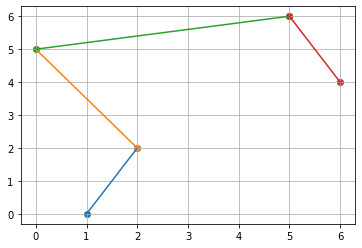

In [ ]:
lenght_of_tree_prim = 0
import math
#[1,0],[0,5],[2,2],[6,4],[5,6]
paircord = [[1,0],[0,5],[2,2],[6,4],[5,6]] #######################################################################INPUT
def metricfunc(lambda_, x, y):
  if lambda_==2: 
    res = math.fabs(x[0]-y[0])+math.fabs(x[1]-y[1])
    return res
  else:
    res = math.sqrt(pow((x[0]-y[0]),2)+pow((x[1]-y[1]),2))  
    #print(res)
    return res

def preparefunc(V_):
  V = V_
  lambda_ = 2 ################################################################METRIC
  mainlist = []
  
  for i in paircord:
    elemlist = []
    for j in paircord:
      elemlist.append(metricfunc(lambda_,i,j)) 
    mainlist.append(elemlist)
  #print(mainlist)
  return mainlist

ListForPlot = []
OutList = []


INF = 9999
V = len(paircord)
G = preparefunc(V)
baselist = [0]*V 
no_edge = 0
baselist[0] = True

while (no_edge < V - 1):
    minimum = INF
    x = 0
    y = 0
    for i in range(V):
        if baselist[i]:
            for j in range(V):
                if ((not baselist[j]) and G[i][j]):  
                    if minimum > G[i][j]:
                        minimum = G[i][j]
                        x = i
                        y = j
    print(str(paircord[x]) + "-" + str(paircord[y]) + ":" + str(G[x][y]))
    lenght_of_tree_prim = lenght_of_tree_prim + G[x][y]
    ListForPlot.append(paircord[x])
    ListForPlot.append(paircord[y])
    OutList.append(paircord[y])
    baselist[y] = True
    no_edge += 1
print("lenght of prim's tree:")
print(lenght_of_tree_prim)
OutList.insert(0, ListForPlot[0])
print("-------out------")
print(OutList)
print("----------------")
print("------Source------")
print(paircord)
print("------------------")
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from numpy.random import normal
%matplotlib inline
i=0
while(i<len(ListForPlot)):
  
  list_x = []
  list_y = []

  list_x.append(ListForPlot[i][0])
  list_x.append(ListForPlot[i+1][0]) 
  list_y.append(ListForPlot[i][1])
  list_y.append(ListForPlot[i+1][1])

  plot(list_x,list_y)
  scatter(list_x,list_y)

  i=i+2
grid(True)

# 2. (Приближение) Дерево Штейнера

lenght of steiner's tree:
15.0
-----OutList---------
[[1, 0], [2, 2], [0, 5], [5, 6], [6, 4]]
--------------
------base--------
[[1, 0], [1, 2], [2, 2], [1, 2], [0, 5], [5, 5], [5, 6], [5, 5], [6, 4]]
--------------
-----------x---------------
[1, 1, 2, 1, 0, 5, 5, 5, 6]
-----------y---------------
[0, 2, 2, 2, 5, 5, 6, 5, 4]
-----------x---------------
[1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 5, 5, 5, 5, 5, 5, 6]
-----------y---------------
[0, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 6, 6, 5, 5, 4, 4]


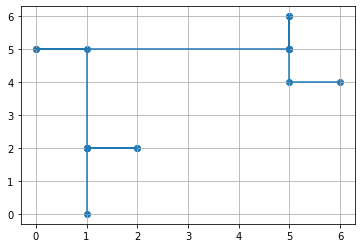

In [ ]:
base = []
base.append(OutList[0])
#print("sourcebase:")
#print(base)
def metricfunc(x, y):
    res = math.fabs(x[0]-y[0])+math.fabs(x[1]-y[1])
    return res

def minim(a, lst):
  M=[]
  for i in lst:
    M.append(metricfunc(a,i))
  indmin=M.index(min(M))
  #print(indmin)
  return lst[indmin]

def fourpoint(a,b):
   l = []
   l.append(a)
   l.append(b)
   t_yx=[a[1], b[0]]
   t_xy=[a[0], b[1]]
   l.append(t_yx)
   l.append(t_xy)
   return l

def dist_p_to_rect(rect, p):
  top_rect = max(rect[0][1], rect[1][1])
  sub_rect = min(rect[0][1], rect[1][1])
  left_rect = min(rect[0][0], rect[1][0])
  right_rect = max(rect[0][0], rect[1][0])
  min_p = [0,0]

  if (p[0] <= left_rect): 
    if (p[1] <= sub_rect):
      min_p[0]=left_rect
      min_p[1]=sub_rect
    elif (p[1] >= top_rect):
      min_p[0]=left_rect
      min_p[1]=top_rect
    else:
      min_p[0]=left_rect
      min_p[1]=p[1]   
  elif (p[0] >= right_rect):
    if (p[1] <= sub_rect):
      min_p[0]=right_rect
      min_p[1]=sub_rect
    elif (p[1] >= top_rect):
      min_p[0]=right_rect
      min_p[1]=top_rect
    else:
      min_p[0]=right_rect
      min_p[1]=p[1]  
  else:
    if (p[1] < sub_rect):
      min_p[0]=p[0]
      min_p[1]=sub_rect
    elif (p[2]> top_rect):
      min_p[0]=p[0]
      min_p[1]=top_rect        
  return min_p


def nearTWOSteiner(V, Tpair, lenght_of_tree_steiner_):
  rot = [0,0]
  tmp = [1,1]
  nehxt = [2,2]
  lenght_of_tree_steiner = lenght_of_tree_steiner_
  
  for i in range(V):
    if Tpair[i] in base:
      continue
 #   print("Tpair:")
 #   print(Tpair[i])
    rot = minim(Tpair[i], base)
    tmp = Tpair[i]
    fourp = fourpoint(rot, tmp)
 #   print("rot:")
 #   print(rot)
 #   print("fourp:")
 #   print(fourp)
    
    if (rot[0]==tmp[0] or rot[1]==tmp[1]):
      base.append(tmp)
      lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(rot, tmp)
      continue
    
    if i == V-1:
      #base.append(fourp[2])
      base.append(Tpair[i])
      lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(rot, tmp)
      continue
    #print("Tpair next:")
    #print(Tpair[i+1])
    nearp = dist_p_to_rect(fourp, Tpair[i+1])
    nehxt = minim(Tpair[i+1], base)
    #print("nehxt:")
    #print(nehxt)
    if (metricfunc(nearp, Tpair[i+1]) <= metricfunc(nehxt, Tpair[i+1])):
      #print("-----------------------------------------------------")
      if ((rot[0] == nearp[0] and rot[1] == nearp[1]) or (tmp[0] == nearp[0] and tmp[1] == nearp[1])):
        #print("is a rot or tmp point!")
        base.append(Tpair[i])
        lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(rot, tmp)
      else:
        lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(rot, nearp)
        lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(nearp, tmp)
        lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(nearp, Tpair[i+1])
        base.append(nearp)
        #print("nearp:")
        #print(nearp)
        base.append(Tpair[i])
        base.append(nearp)
        base.append(Tpair[i+1])
    else: 
      base.append(Tpair[i])
      lenght_of_tree_steiner = lenght_of_tree_steiner + metricfunc(rot, tmp)
  print("lenght of steiner's tree:")
  print(lenght_of_tree_steiner)

#-------------------------
lenght_of_tree_steiner = 0
nearTWOSteiner(V, OutList, lenght_of_tree_steiner)

print("-----OutList---------")
print(OutList)
print("--------------")
print("------base--------")
print(base)
print("--------------")

list_x = []
list_y = []

for i in base:
  list_x.append(i[0]) 
  list_y.append(i[1])

print("-----------x---------------")
print(list_x)
print("-----------y---------------")
print(list_y)
iind = 0
dlina = len(list_x)-1
while (iind < dlina):
  list_x.insert((iind*2+1),list_x[2*iind])
  list_y.insert((iind*2+1),list_y[2*iind+1])
  iind = iind + 1

print("-----------x---------------")
print(list_x)
print("-----------y---------------")
print(list_y)

plot(list_x,list_y)
scatter(list_x,list_y)
grid(True)

-----------x---------------
[1, 2, 5, 6, 6]
-----------y---------------
[2, 1, 6, 5, 6]
-----------x---------------
[1, 1, 2, 2, 5, 5, 6, 6, 6]
-----------y---------------
[2, 1, 1, 6, 6, 5, 5, 6, 6]


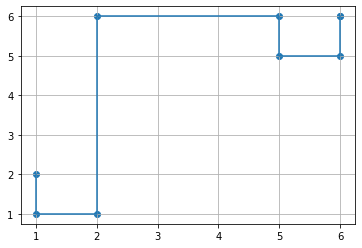

In [ ]:
V=5 #max value = 10
lambda_=2 #const value
Tpair=[]

from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from numpy.random import normal
%matplotlib inline

list_x = []
list_y = []

for i in Tpair:
  list_x.append(i[0]) 
  list_y.append(i[1])

print("-----------x---------------")
print(list_x)
print("-----------y---------------")
print(list_y)
iind = 0
dlina = len(list_x)-1
while (iind < dlina):
  list_x.insert((iind*2+1),list_x[2*iind])
  list_y.insert((iind*2+1),list_y[2*iind+1])
  iind = iind + 1

print("-----------x---------------")
print(list_x)
print("-----------y---------------")
print(list_y)

plot(list_x,list_y)
scatter(list_x,list_y)
grid(True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


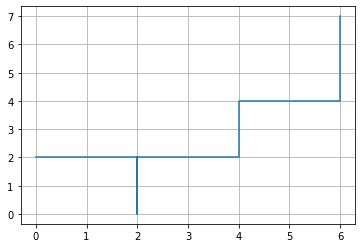

In [ ]:
u = u"""y   x
  7.0 6.0
  4.0 4.0
  2.0 2.0
  0.0 2.0
  2.0 0.0"""

import io
import matplotlib.pyplot as plt
import numpy as np

y,x = np.genfromtxt(io.StringIO(u),skip_header=1, unpack=True)

step = plt.plot(x,y, linestyle="steps-pre")
plt.grid()
plt.show()

#3 Связность графа --> Число блоков --> Перечислить вершины блоков.
  По заданному графу алгоритм определяет, является ли он связным. Если да, то выдает количество блоков, перечисляет вершины каждого блока.

connected
Blocks [[0, 1, 2], [1, 3, 4, 5], [1, 6]]


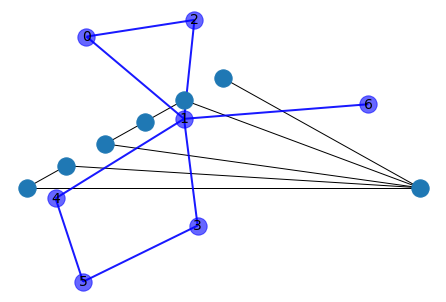

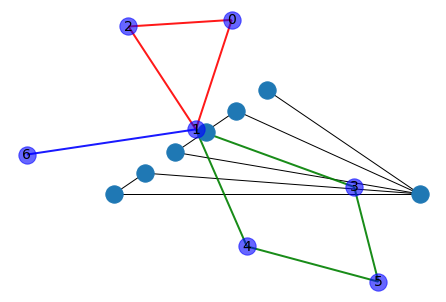

In [ ]:

#Input: n=5 [1,2,0,3,0,4,0] : (from 0 to 1&2), (from 1 to 3), (from 2 to 4).
#   Г------v2-----v4
#   |
#   v0   
#   |
#   L------v1-----v3
import copy

#n=5
#MyIn= [[0,1,1,0,0], 
#    [1,0,0,1,0],
#    [1,0,0,0,1],
#    [0,1,0,0,0],
#    [0,0,1,0,0]]

#n=5
#MyIn= [[0,1,1,1,0], 
#    [1,0,1,0,0],
#    [1,1,0,0,0],
#    [1,0,0,0,1],
#    [0,0,0,1,0]]

n=7
MyIn = [[0,1,1,0,0,0,0], #v0
        [1,0,1,1,1,0,1], #v1
        [1,1,0,0,0,0,0], #v2
        [0,1,0,0,0,1,0], #v3
        [0,1,0,0,0,1,0], #v4
        [0,0,0,1,1,0,0], #v5
        [0,1,0,0,0,0,0]] #v6

#n=4
#MyIn = [[0,1,0,0], #v0
#        [1,0,1,0], #v1
#        [0,1,0,1], #v2
#        [0,0,1,0]] #v3

#n=12
#MyIn= [[0,1,1,0,0,0,0,0,0,0,0,0], #v0
#       [1,0,1,0,0,0,0,0,0,0,0,0], #v1
#       [1,1,0,1,1,1,0,0,0,0,0,0], #v2
#       [0,0,1,0,1,0,0,0,0,0,0,0], #v3
#       [0,0,1,1,0,0,0,0,0,0,0,0], #v4
#       [0,0,1,0,0,0,1,0,0,1,0,0], #v5
#       [0,0,0,0,0,1,0,1,0,1,0,0], #v6
#       [0,0,0,0,0,0,1,0,1,1,0,0], #v7
#       [0,0,0,0,0,0,0,1,0,0,0,0], #v8
#       [0,0,0,0,0,1,1,1,0,0,1,1], #v9
#       [0,0,0,0,0,0,0,0,0,1,0,0], #v10
#       [0,0,0,0,0,0,0,0,0,1,0,0]] #v11
#n=8
#MyIn = [[0,1,0,0,0,0,0,1],
#        [1,0,1,0,0,0,0,0],
#        [0,1,0,1,0,0,0,0],
#        [0,0,1,0,1,0,0,0],
#        [0,0,0,1,0,1,0,0],
#        [0,0,0,0,1,0,1,0],
#        [0,0,0,0,0,1,0,1],
#        [1,0,0,0,0,0,1,0]]

#n=6
#MyIn = [[0,1,1,1,0,0],
#	[1,0,1,0,1,1],
#	[1,1,0,1,0,0],
#	[1,0,1,0,1,1],
#	[0,1,0,1,0,1],
#	[0,1,0,1,1,0]]


#n=10
#MyIn = [[0,1,0,0,1,1,0,0,0,0],
#	[1,0,1,0,0,0,1,0,0,0],
#	[0,1,0,1,0,0,0,1,0,0],
#	[0,0,1,0,1,0,0,0,1,0],
#	[1,0,0,1,0,0,0,0,0,1],
#	[1,0,0,0,0,0,0,1,1,0],	
#	[0,1,0,0,0,0,0,0,1,1],
#	[0,0,1,0,0,1,0,0,0,1],
#	[0,0,0,1,0,1,1,0,0,0],
#	[0,0,0,0,1,0,1,1,0,0]]

#n=6  
#MyIn = [[0,1,1,1,1,0],
#	[1,0,1,0,1,1],
#	[1,1,0,1,0,1],
#	[1,0,1,0,1,1],
#	[1,1,0,1,0,0],
#	[0,1,1,1,0,0]]

'''n=12
MyIn = [[0,0,0,1,1,0,0,0,0,0,0,0],
	[0,0,1,1,0,0,0,0,0,0,0,0],
	[0,1,0,1,0,0,0,0,0,0,0,0],
	[1,1,1,0,1,1,1,0,0,0,0,0],
	[1,0,0,1,0,0,0,0,0,0,0,0],
	[0,0,0,1,0,0,1,0,0,0,0,0],
	[0,0,0,1,0,0,0,1,1,0,0,0],
	[0,0,0,0,0,0,1,0,1,1,1,1],
	[0,0,0,0,0,0,1,1,0,1,0,0],
	[0,0,0,0,0,0,0,1,1,0,0,0],
	[0,0,0,0,0,0,0,1,0,0,0,0],
	[0,0,0,0,0,0,0,1,0,0,0,0]]
'''
Blocks = []
Fill = [False]*n
thanos = True
def deepfunc(v, MyInput, visited, components, count_connect):
    components[v] = count_connect
    counter = 0
    visited[v] = True
    for w in MyInput[v]:
      if w==0: 
        counter=counter+1
        continue
      if not visited[counter]:  
        deepfunc(counter, MyInput, visited, components, count_connect)
      counter=counter+1

def deletepoint (root, MyList):
  for v in range(n):
    if (v==root):
      for w in range(n):
        MyList[v][w]=0
    else: MyList[v][root]=0
  return MyList

def PrepareComponent(Component, MyComponent):
    #print(MyComponent)
    for v in Component:
      MyComponent = deletepoint(v,MyComponent)
    return MyComponent

smerty = True
def findblocks(s, MyInp, lencomponent, FreePoint, block):
  global thanos
  global smerty
  visited = [False] * n
  components = [-1] * n
  count_connect = 0
  consta = False
  #block = toint(block)
  deepfunc(s, MyInp, visited, components, count_connect)
  if (visited.count(True) == lencomponent):
    if smerty:
      print("connected")
      smerty = False
    for root in range(n):
      if not thanos: return
      components = [-1] * n
      visited = [False] * n
      count_connect = 0
      MyInput = copy.deepcopy(MyInp)
      
      for freep in FreePoint:
        deepfunc(freep, MyInput, visited, components, -1) 
  
      MyList = deletepoint(root, MyInput)
      if not visited[root]:
        deepfunc(root, MyList, visited, components, count_connect)
      
      for v in range(n):
        if not visited[v]:
          count_connect += 1
          deepfunc(v,MyList, visited, components, count_connect)
      if (count_connect==1): 
        if (root == n-1): 
          #print("block",block)
          for j in block:
            if not Fill[j]: 
              consta = True
              Fill[j]=True
          if consta: Blocks.append(block) 
          #print("Fill",Fill)
          if (Fill.count(True) == n): 
            thanos = False
            #print("stop")
            return
        continue #root is not a cut vertex
      else: 
        for i in (number+1 for number in range(count_connect)):
          
          MyInput2 = copy.deepcopy(MyInp)
          CurrentComponentList = PrepareComponent([index for index, value in enumerate(components) if (value != i and value !=0)], MyInput2)

          newlist = [index for index, value in enumerate(components) if (value == i or value ==0)]

          findblocks(newlist[0], CurrentComponentList, len(newlist), [index for index, value in enumerate(components) if (value != i and value !=0)], newlist)
      #break
    #Blocks.append(block)    
          
          
  
  else: 
    print("not connected")
    print(visited)



FreeP = []
freeblock=[]
findblocks(0,MyIn,n,FreeP,freeblock)
print("Blocks", Blocks)
#print("Input ", n)
#print("MyIn", MyIn)

#convert matrix smejnosti to list smejnosti
MyIn_nx = []
for lst11 in MyIn:
  for index,value in enumerate(lst11):
    if value == 1:
      MyIn_nx.append(index)
  MyIn_nx.append(-1)    
#print("MyIn_nx ",MyIn_nx)

import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='spring',
               node_size=300, node_color='blue', node_alpha=0.6,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.9, edge_tickness=2,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
    #print(nodes)
    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    '''# draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)'''
    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    #if labels is None:
    #    labels = range(len(graph))

    #edge_labels = dict(zip(graph, labels))
    #nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
     #                            label_pos=edge_text_pos)

    # show graph
    plt.show()


# draw example
def add_edges_nx_blocks(in_graph):
  #count_for_color_map_edge = 0
  number_of_nodes = 0
  addedge_rebro_nx = []
  for in_nodes in in_graph:
      edge_rebro = []
      if in_nodes == -1: 
        number_of_nodes += 1
        continue
      if in_nodes <= number_of_nodes:
        continue
      edge_rebro.append(number_of_nodes)
      edge_rebro.append(in_nodes)
      edge_rebro = tuple (edge_rebro)
      addedge_rebro_nx.append(edge_rebro)

      #if (in_nodes in separator_vertices) or (number_of_nodes in separator_vertices):
      #  map_edges.append(count_for_color_map_edge)
      #count_for_color_map_edge += 1
  return addedge_rebro_nx


rebro_nx_blocks=add_edges_nx_blocks(MyIn_nx)
draw_graph(rebro_nx_blocks, graph_layout='spring')

def find_color_map_edges(in_graph):
  flag_color_map = []
  for one_block in Blocks:
    number_of_nodes = 0
    count_for_color_map_edge = 0
    for in_nodes in in_graph:
      if in_nodes == -1: 
        number_of_nodes += 1
        continue
      if in_nodes <= number_of_nodes:
        continue
      if (in_nodes in one_block) and (number_of_nodes in one_block):
        flag_color_map.append(count_for_color_map_edge)
      count_for_color_map_edge += 1
    flag_color_map.append(-1)  
  
  color_map_edge_blocks = ['empty']*len(rebro_nx_blocks)
  switcher_color = 0
  for edge_block in flag_color_map:
    if edge_block == -1:
      switcher_color += 1
      if switcher_color == 6:
        switcher_color = 0
      continue
    if switcher_color == 0:
        color_map_edge_blocks[edge_block] = 'red'
    elif switcher_color == 1:
        color_map_edge_blocks[edge_block] = 'green'
    elif switcher_color == 2:
        color_map_edge_blocks[edge_block] = 'blue'
    elif switcher_color == 3:
        color_map_edge_blocks[edge_block] = 'yellow' 
    elif switcher_color == 4:
        color_map_edge_blocks[edge_block] = 'orange'
    elif switcher_color == 5:
        color_map_edge_blocks[edge_block] = 'grey'
  #print(color_map_edge_blocks)
  return color_map_edge_blocks

cmap_edge_block = find_color_map_edges(MyIn_nx)
draw_graph(rebro_nx_blocks, edge_color=cmap_edge_block)

#4 Число связности графа --> Перечислить вершины
  По заданному графу определить его число связности. На вход алгоритма подается список смежности графа. На выходе получаем число связности и номера вершин, удаление которых приводит к несвязному графу.

0.8.3
IGRAPH U--- 9 15 -- 
source 0
target 3
k-vertex-connected graph: k= 3
separators:  [1, 2, 8]
{0, 1, 2, 3, 4, 5, 6, 7, 8}


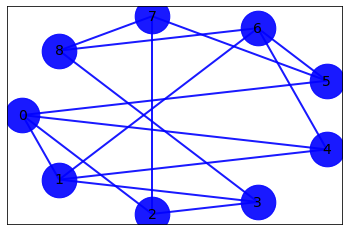

{0, 1, 2, 3, 4, 5, 6, 7, 8}


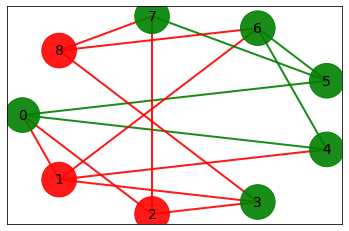

In [ ]:
import igraph
from igraph import *
print(igraph.__version__)
import copy

#Input: n=5 [ 1,2,4,  -1,  0,2,  -1,  0,1,3,4,  -1,  2,4,  -1,  0,2,3,  -1 ] notorientgraph
#                   0-----4
#                  / \   / \
#                 /   \ /   \
#                1-----2-----3
number_n=9
in_graph_list = [ 1,2,4,5,  -1,  0,3,4,6,  -1,  0,3,7,  -1,  1,2,8,  -1,  0,1,6,  -1, 0,6,7, -1, 1,4,5,8, -1, 2,5,8, -1, 3,6,7, -1]

#number_n=5
#in_graph_list = [1,2,  -1,  0,3,  -1,  0,4,  -1,  1,  -1,  2,  -1]
         
#number_n=5
#in_graph_list = [1,2,3,  -1,  0,2,  -1,  0,1,  -1,  0,4,  -1,  3,  -1]
         
#number_n=7
#in_graph_list = [1,2,    -1,  0,2,3,4,6,   -1,  0,1,   -1,  1,5,   -1,  1,5,   -1,  3,4,   -1,  1,   -1]
          
#number_n=4
#in_graph_list = [1,  -1,  0,2,   -1,   1,3,   -1,   2,   -1]

#number_n=12
#in_graph_list = [ 1,2,   -1,  0,2,   -1,   0,1,3,4,5,  -1,  2,4,   -1,  2,3,   -1,  2,6,9,   -1,  5,7,9,   -1,  6,8,9,  -1,  7,   -1,  5,6,7,10,11,   -1,  9,  -1,  9,  -1]

#number_n=8
#in_graph_list = [  1,7,  -1,  0,2,   -1,  1,3,   -1,  2,4,   -1,  3,5,   -1,  4,6,   -1,  5,7,  -1,  0,6,   -1]

#number_n=6
#in_graph_list = [  1,2,3,  -1,  0,2,4,5,   -1,  0,1,3,   -1,  0,2,4,5,   -1,  1,3,5,   -1,  1,3,4,   -1]
         
#number_n=10
#in_graph_list = [1, 4, 5,   -1,   0, 2, 6,   -1,   1, 3, 7,   -1,   2, 4, 8,   -1,   0, 3, 9,   -1,   0, 7, 8,   -1,   1, 8, 9,   -1,   2, 5, 9,   -1,   3, 5, 6,   -1,    4, 6, 7,   -1]

#number_n=6
#in_graph_list = [1, 2, 3, 4,    -1,      0, 2, 4, 5,    -1,    0, 1, 3, 5,    -1,   0, 2, 4, 5,   -1,   0, 1, 3,   -1,   1, 2, 3,   -1]

#number_n=12
#in_graph_list = [3, 4, -1, 2, 3, -1, 1, 3, -1, 0, 1, 2, 4, 5, 6, -1, 0, 3, -1, 3, 6, -1, 3, 7, 8, -1, 6, 8, 9, 10, 11, -1, 6, 7, 9, -1, 7, 8, -1, 7, -1, 7, -1]

separator_vertices = []

def not_smejnie(chislo, isxod):
  flaglst = [True]*number_n
  tmpflag=True
  count_chisla = 0
  for ii in isxod:
    if count_chisla == chislo:
      tmpflag=False
      if (ii == -1): break
      flaglst[ii]=False
    if (ii == -1 and tmpflag): count_chisla += 1
  flaglst[chislo]=False
  tmplst = [index for index, value in enumerate(flaglst) if value == True]
  #print("flaglst:",flaglst)
  #print("tmplst:",tmplst)
  return tmplst

def intersection_of_list_and_listoflist(lst1, lst2): 
    global separator_vertices
    is_intersect_count = 0
    for value2 in lst2:
      for value1 in lst1:
        if value1 in value2:
          is_intersect_count += 1
          break
    if (is_intersect_count == len(lst2)):
      print("separators: ", lst1)
      separator_vertices = copy.copy(lst1)
      return 0
    else: 
      print("not separators: ", lst1)
      return -1

def init_our_graph_and_find_vertex():
  g = Graph()
  g.add_vertices(number_n)
  number_of_nodes = 0
  addedge_rebro = []
  for in_nodes in in_graph_list:
    edge_rebro = []
    if in_nodes == -1: 
      number_of_nodes += 1
      continue
    if in_nodes <= number_of_nodes:
      continue
    edge_rebro.append(number_of_nodes)
    edge_rebro.append(in_nodes)
    edge_rebro = tuple (edge_rebro)
    addedge_rebro.append(edge_rebro)
  g.add_edges(addedge_rebro)
  summary(g)
  
  stok = 0
  istok = 0
  minvertex = 999
  for i in range(number_n):
    lst_forj = not_smejnie(i,in_graph_list)
    for j in lst_forj:
      tmp = g.vertex_disjoint_paths(i, j, checks=True, neighbors="ignore")
      if minvertex > tmp:
        minvertex=tmp
        istok=i
        stok=j

  print("source", istok)
  print("target", stok)
  print("k-vertex-connected graph: k=", minvertex)
  #print("neis: ",g.neighborhood([0, 1], order=1))
  all_simple_paths = g.get_all_simple_paths(istok,stok)
  #print("simple_path: ", all_simple_paths)
  #print("mincut: ", g.mincut())
  #print("st_mincut: ", g.st_mincut(0,3))
  #print("cut vertices: ", g.articulation_points())
  #print("edge_connectivity: ", g.edge_connectivity())
  #print("adhesion: ", g.adhesion())
  #print("shortest_paths: ", g.get_all_shortest_paths(0,3))
  #print("spanning_tree: ", g.spanning_tree())
  #print("betweenness ",g.betweenness((0,3), directed=False, cutoff=None, weights=None, nobigint=True))
  minimum_size_separators = g.minimum_size_separators()
  #print("all_minimal_st_separators ", g.all_minimal_st_separators())
  #print("minimum_size_separators ", minimum_size_separators)

  for separs in minimum_size_separators:
    separs_is_istok = False
    for valu in separs: 
      if (valu == istok or valu == stok): separs_is_istok = True
    if (separs_is_istok == True): continue
    if intersection_of_list_and_listoflist(separs, all_simple_paths) == 0:
      break 

init_our_graph_and_find_vertex()

import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='shell',
               node_size=1200, node_color='blue', node_alpha=0.9,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.9, edge_tickness=2,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
    print(nodes)
    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    '''# draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)'''
    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    #if labels is None:
    #    labels = range(len(graph))

    #edge_labels = dict(zip(graph, labels))
    #nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
     #                            label_pos=edge_text_pos)

    # show graph
    plt.show()


# draw example
def add_edges_nx(in_graph, map_edges):
  count_for_color_map_edge = 0
  number_of_nodes = 0
  addedge_rebro_nx = []
  for in_nodes in in_graph:
      edge_rebro = []
      if in_nodes == -1: 
        number_of_nodes += 1
        continue
      if in_nodes <= number_of_nodes:
        continue
      edge_rebro.append(number_of_nodes)
      edge_rebro.append(in_nodes)
      edge_rebro = tuple (edge_rebro)
      addedge_rebro_nx.append(edge_rebro)
      if (in_nodes in separator_vertices) or (number_of_nodes in separator_vertices):
        map_edges.append(count_for_color_map_edge)
      count_for_color_map_edge += 1
  return addedge_rebro_nx

flag_color_map = []
rebro_nx=add_edges_nx(in_graph_list, flag_color_map)
draw_graph(rebro_nx)

color_map = []
for node in range(number_n):
    if node in separator_vertices:
        color_map.append('red')
    else: 
        color_map.append('green') 

color_map_edge = []
for edge in range(len(rebro_nx)):
    if edge in flag_color_map:
        color_map_edge.append('red')
    else: 
        color_map_edge.append('green') 

        
draw_graph(rebro_nx, node_color=color_map, edge_color=color_map_edge)




#5. Найти минимальный разрез в графе

Input graph:
[0, 1, 1, 1, 0, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 1, 0]

List_for_min_edge_cuts
[[0, 1], [0, 2], [0, 3]]
[[0, 1], [0, 2], [0, 3]]
[[0, 1], [0, 2], [0, 3]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[1, 0], [1, 2], [1, 3]]
[[1, 0], [1, 2], [1, 3]]
[[1, 0], [1, 2], [1, 3]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[1, 0], [2, 0], [3, 0]]
[[0, 1], [2, 1], [3, 1]]
[[2, 0], [2, 1], [2, 3], [2, 4]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[1, 0], [2, 0], [3, 0]]
[[0, 1], [2, 1], [3, 1]]
[[3, 0], [3, 1], [3, 2], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[2, 4], [3, 5]]
[[4, 2], [5, 3]]
[[4, 2], [5, 3]]
[[4, 2], [5, 3]]
[[4, 2], [5, 3]]
[[4, 2], [4, 5], [4, 6], [4, 7]]
[[4, 6], [5, 6], [7, 6]]
[[4, 7], [5, 7], [6, 7]]
[[4, 2], [5, 3]]
[[4, 2]

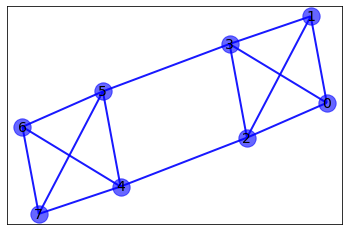

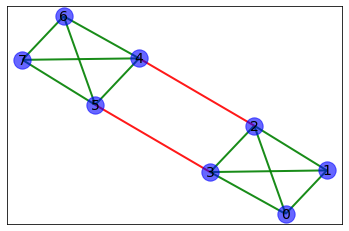

In [ ]:
from collections import defaultdict 
import copy

def new_set_source_sink_nodes(source_node, sink_node, graph_in):
  
  #replace zero node and input source_node: [source_node] <-> [0]
  tmp_row = graph_in[source_node]
  graph_in[source_node]=graph_in[0]
  graph_in[0]=tmp_row

  #replace last node and input sink_node: [sink_node] <-> [len(graph_in[0])-1]
  tmp_row = graph_in[sink_node]
  graph_in[sink_node]=graph_in[(len(graph_in[0])-1)]
  graph_in[(len(graph_in[0])-1)]=tmp_row

  #replace edges in a new redesignated graph
  for row in graph_in:

    #edges of source_node and zero node
    tmp_elem=row[source_node]
    row[source_node]=row[0]
    row[0]=tmp_elem

    #edges of sink_node and (len(graph_in[0])-1) node
    tmp_elem=row[sink_node]
    row[sink_node]=row[(len(graph_in[0])-1)]
    row[(len(graph_in[0])-1)]=tmp_elem

#new_graph = copy.deepcopy(source_graph)
#print("Исходный граф: ")
#print()
#for row in new_graph:
#  print(row)

#source = 0
#sink = 1

#new_set_source_sink_nodes(source,sink,new_graph)
#print()
#print()
#print("New graph: ")
#print()
#for row in new_graph:
#  print(row) 

class Graph: 
   
    def __init__(self,graph): 
        self.graph = graph 
        self.original_graph = [i[:] for i in graph]
        self.row = len(graph)  

    def dfs(self, graph,s,visited_dfs): 
        visited_dfs[s]=True
        for i in range(len(graph)): 
            if graph[s][i]>0 and not visited_dfs[i]: 
                self.dfs(graph,i,visited_dfs) 
          
    def bfs(self,s, t, parent):  
        #print(graph)
        visited =[False]*(self.row) 
        queue=[] 
        queue.append(s) 
        visited[s] = True 
        while queue: 
            u = queue.pop(0)  
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 
        
        return True if visited[t] else False
              

    def FordFulkerson(self, source, sink): 

        parent = [-1]*(self.row) #for save path
        main_flow = 0
  
        while self.bfs(source, sink, parent) : 
            #print("path", parent)            
            main_flow += 1 
   
            v = sink 
            while(v !=  source): 
                u = parent[v] 
                self.graph[u][v] = 0 
                self.graph[v][u] = 1 
                v = parent[v] 
  
        ###########min_edge_cut relative to selected source node and sink node
        visited_dfs=[False]*(self.row) 
        self.dfs(self.graph,source,visited_dfs)
        edges_cuts = []
        for i in range(self.row):  
          for j in range(self.row):  
            if self.graph[i][j] == 0 and self.original_graph[i][j] > 0 and visited_dfs[i] and visited_dfs[i] != visited_dfs[j]:  
              edge_cut = []
              edge_cut.append(i)
              edge_cut.append(j)
              edges_cuts.append(edge_cut)
        ############min_edge_cut relative to selected source node and sink node

        #print("Max flow value : ",main_flow)
        return edges_cuts
####################################################################test
'''graph = [[0,1,1,0,0,0],   
         [1,0,1,1,1,0],  
         [1,1,0,1,1,0],  
         [0,1,1,0,1,1], 
         [0,1,1,1,0,1],  
         [0,0,0,1,1,0]]
      
graph = [[0,1,1,1,0],    
         [1,0,1,0,1],  
         [1,1,0,1,1],  
         [1,0,1,0,1], 
         [0,1,1,1,0]] 

graph = [[0,1,1,0,0,0],   
         [1,0,1,1,1,0],  
         [1,1,0,0,1,0],  
         [0,1,0,0,0,1], 
         [0,1,1,0,0,1],  
         [0,0,0,1,1,0]]

graph = [[0,1,1,0,0],   
         [1,0,1,0,0],  
         [1,1,0,1,1],  
         [0,0,1,0,1], 
         [0,0,1,1,0]]
'''
         #0 1 2 3 4 5 6 7
graph = [[0,1,1,1,0,0,0,0], #0   
         [1,0,1,1,0,0,0,0], #1
         [1,1,0,1,1,0,0,0], #2  
         [1,1,1,0,0,1,0,0], #3
         [0,0,1,0,0,1,1,1], #4
         [0,0,0,1,1,0,1,1], #5   
         [0,0,0,0,1,1,0,1], #6
         [0,0,0,0,1,1,1,0]] #7
####################################################################test  
#source = 3; sink = 3 [error] must be not equal
List_for_min_edge_cuts = []
for source in range(len(graph[0])):
  for sink in range(len(graph[0])):
    if source != sink:
      copy_graph = copy.deepcopy(graph)
      g = Graph(copy_graph)
      List_for_min_edge_cuts.append(g.FordFulkerson(source, sink))

print("Input graph:")
for row in graph:
  print(row)

print()
print("List_for_min_edge_cuts")
for row in List_for_min_edge_cuts:
  print(row)
print()
min_cut_edge_list = min(List_for_min_edge_cuts, key=len)
print("min edge cut in the whole graph", min_cut_edge_list)


#convert matrix adjacency to list adjacency
Mygraph_List = []
for row in graph:
  for index,value in enumerate(row):
    if value == 1:
      Mygraph_List.append(index)
  Mygraph_List.append(-1)    

import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph, labels=None, graph_layout='spring',
               node_size=300, node_color='blue', node_alpha=0.6,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.9, edge_tickness=2,
               edge_text_pos=0.3,
               text_font='sans-serif'):

    # extract nodes from graph
    nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
    #print(nodes)
    # create networkx graph
    G=nx.Graph()

    # add nodes
    for node in nodes:
        G.add_node(node)

    # add edges
    for edge in graph:
        G.add_edge(edge[0], edge[1])

    '''# draw graph
    pos = nx.shell_layout(G)
    nx.draw(G, pos)'''
    # these are different layouts for the network you may try
    # shell seems to work best
    if graph_layout == 'spring':
        graph_pos=nx.spring_layout(G)
    elif graph_layout == 'spectral':
        graph_pos=nx.spectral_layout(G)
    elif graph_layout == 'random':
        graph_pos=nx.random_layout(G)
    else:
        graph_pos=nx.shell_layout(G)

    # draw graph
    nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                           alpha=node_alpha, node_color=node_color)
    nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                           alpha=edge_alpha,edge_color=edge_color)
    nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                            font_family=text_font)

    #if labels is None:
    #    labels = range(len(graph))

    #edge_labels = dict(zip(graph, labels))
    #nx.draw_networkx_edge_labels(G, graph_pos, edge_labels=edge_labels, 
     #                            label_pos=edge_text_pos)

    # show graph
    plt.show()


# draw example
def add_edges_nx(in_graph, map_edges):
  count_for_color_map_edge = 0
  number_of_nodes = 0
  addedge_rebro_nx = []
  for in_nodes in in_graph:
      edge_rebro = []
      if in_nodes == -1: 
        number_of_nodes += 1
        continue
      if in_nodes <= number_of_nodes:
        continue
      edge_rebro.append(number_of_nodes)
      edge_rebro.append(in_nodes)

      if edge_rebro in min_cut_edge_list:
        map_edges.append(count_for_color_map_edge)
      
      edge_rebro = tuple (edge_rebro)
      addedge_rebro_nx.append(edge_rebro)

      count_for_color_map_edge += 1
  return addedge_rebro_nx

flag_color_map = []
rebro_nx=add_edges_nx(Mygraph_List, flag_color_map)
draw_graph(rebro_nx)


color_map_edge = []
for edge in range(len(rebro_nx)):
    if edge in flag_color_map:
        color_map_edge.append('red')
    else: 
        color_map_edge.append('green') 

        
draw_graph(rebro_nx, edge_color=color_map_edge)


In [ ]:
!pip install networkx

In [ ]:
!pip install python-igraph

     |████████████████████████████████| 3.2MB 5.5MB/s 


#6.Алгоритм Кернигана-Лина

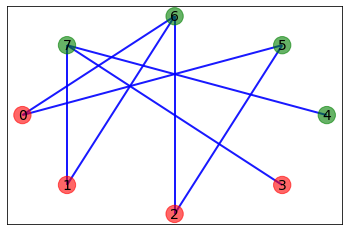

Edge number between RED and GREEN group:  7
group RED [0, 1, 2, 3]
group GREEN [4, 5, 6, 7]
Improvement_values [2, 2, 2, 1, -1, 2, 3, 1]
Pair_improvements [[[1, 5], 4], [[3, 6], 2], [[0, 4], -3], [[2, 7], -3]]
Improvement: 6
new Edge number between RED and GREEN group:  1

group RED [0, 2, 5, 6]
group GREEN [1, 3, 4, 7]
Improvement_values [-2, 0, -2, -1, -1, -2, -1, -3]
Pair_improvements [[[0, 1], -2], [[5, 3], -1], [[2, 7], 1], [[6, 4], 2]]


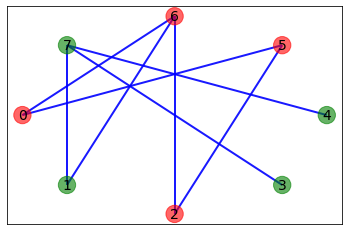

Total Improvement: 6
result Edge number between RED and GREEN group:  1


In [27]:
import copy
import itertools


import networkx as nx
import matplotlib.pyplot as plt

#networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection
#kernighan_lin_bisection(G, partition=None, max_iter=10, weight='weight', seed=None)

        # 0 1 2 3 4 5 6 7
input = [[0,0,0,0,0,1,1,0],#0 
         [0,0,0,0,0,0,1,1],#1 
         [0,0,0,0,0,1,1,0],#2 
         [0,0,0,0,0,0,0,1],#3  
         [0,0,0,0,0,0,0,1],#4 
         [1,0,1,0,0,0,0,0],#5  
         [1,1,1,0,0,0,0,0],#6 
         [0,1,0,1,1,0,0,0]]#7 
'''
input = [[0,1,1,1,1],
         [1,0,1,1,1],
         [1,1,0,1,1],
         [1,1,1,0,1],
         [1,1,1,1,0]]
'''
from collections import defaultdict 

class Graph: 
  
    def __init__(self, graph): 
        self.graph = graph
        self.original_graph = [i[:] for i in graph]
        self.size = len(graph)
        self.PartList = [-1]*self.size

    def matr_to_list(self):
        Mygraph_List = []
        for row in self.graph:
            for index,value in enumerate(row):
                if value == 1:
                   Mygraph_List.append(index)
            Mygraph_List.append(-1)
        return Mygraph_List     

    def add_edges_nx(self, in_graph):
        number_of_nodes = 0
        addedge_rebro_nx = []
        for in_nodes in in_graph:
          edge_rebro = []
          if in_nodes == -1: 
            number_of_nodes += 1
            continue
          if in_nodes <= number_of_nodes:
            continue
          edge_rebro.append(number_of_nodes)
          edge_rebro.append(in_nodes)
          edge_rebro = tuple (edge_rebro)
          addedge_rebro_nx.append(edge_rebro)
        return addedge_rebro_nx

    def draw_graph(self, graph, labels=None, graph_layout='bipartite',
                  node_size=300, node_color='blue', node_alpha=0.6,
                  node_text_size=14,
                  edge_color='blue', edge_alpha=0.9, edge_tickness=2,
                  edge_text_pos=0.3,
                  text_font='sans-serif'):

        nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])

        G=nx.Graph()

        for node in nodes:
            G.add_node(node)

        for edge in graph:
            G.add_edge(edge[0], edge[1])

        if graph_layout == 'spring':
            graph_pos=nx.spring_layout(G)
        elif graph_layout == 'spectral':
            graph_pos=nx.spectral_layout(G)
        elif graph_layout == 'random':
            graph_pos=nx.random_layout(G)
        else:
            graph_pos=nx.shell_layout(G)

        nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                              alpha=node_alpha, node_color=node_color)
        nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                              alpha=edge_alpha,edge_color=edge_color)
        nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                                font_family=text_font)

        plt.show()

    def get_Improvement(self, node):
        Improvement_value = 0 # Improvement = Cut_Count - UnCut_Count
        
        for j in range(self.size):
          if self.graph[node][j] == 1:
            if self.PartList[node] != self.PartList[j]:
              Improvement_value += 1
            else:
              Improvement_value -= 1
           
        return Improvement_value
    
    def get_partition_cost(self):
        cost = 0
        for i in range(self.size):
          for j in range(i+1, self.size):
            if self.graph[i][j]==1 and self.PartList[i] != self.PartList[j]:
                cost += 1
        return cost

    def Kernighan_Lin_algorithm(self):
        #PART
        for i in range(int(self.size/2)):
            self.PartList[i] = 0
        for i in range(int(self.size/2), self.size):
            self.PartList[i] = 1

        #DRAW
        color_map = []
        for i in range(self.size):
            if self.PartList[i] == 0:
                color_map.append('red')
            else: 
                color_map.append('green')
        self.draw_graph(self.add_edges_nx(self.matr_to_list()), node_color=color_map)

        #GET COST NOW
        print("Edge number between RED and GREEN group: " , self.get_partition_cost())

        Total_Improvement = 0
        while True:
            group_a = []
            group_b = []
            
            group_a = [index for index,value in enumerate(self.PartList) if value==0]
            group_b = [index for index,value in enumerate(self.PartList) if value==1]
            print("group RED", group_a)
            print("group GREEN", group_b)

            Improvement_values = [self.get_Improvement(node) for node in range(self.size)]
            print("Improvement_values",Improvement_values)
            
            Pair_improvements = []

            for _ in range(int(self.size/2)): 
            
                max_Pair_improvement = -1 * float("inf") # -infinity
                pair = []
                for a in group_a:
                    for b in group_b:
                        Pair_improvement = Improvement_values[a] + Improvement_values[b]
                        if self.graph[a][b] == 1:
                          Pair_improvement -= 2
        
                        if Pair_improvement > max_Pair_improvement:
                            max_Pair_improvement = Pair_improvement
                            pair = [a, b] 

                a = pair[0]
                b = pair[1]
                group_a.remove(a)
                group_b.remove(b)
                Pair_improvements.append([[a, b], max_Pair_improvement])

                # update Improvement
                for x in group_a:
                  if self.graph[x][a] == 1:
                    Improvement_values[x] += 2
                  if self.graph[x][b] == 1:
                    Improvement_values[x] -= 2
            
                for y in group_b:
                  if self.graph[y][b] == 1:
                    Improvement_values[y] += 2
                  if self.graph[y][a] == 1:
                    Improvement_values[y] -= 2
            
            print("Pair_improvements",Pair_improvements)
            
            g_max = -1 * float("inf")
            jmax = 0
            for j in range(1, len(Pair_improvements) + 1):
                g_sum = 0
                for i in range(j):
                    g_sum += Pair_improvements[i][1]
            
                if g_sum > g_max:
                    g_max = g_sum
                    jmax = j

            if g_max > 0:
                for i in range(jmax):
                    for v in range(self.size):
                        if v == Pair_improvements[i][0][0]:
                            self.PartList[v] = 1
                        elif v == Pair_improvements[i][0][1]:
                            self.PartList[v] = 0
                
                Total_Improvement += g_max
                print("Improvement:",g_max)
                print("new Edge number between RED and GREEN group: " , self.get_partition_cost())
                print()
            else: break 

        #DRAW
        color_map = []
        for i in range(self.size):
            if self.PartList[i] == 0:
                color_map.append('red')
            else: 
                color_map.append('green')
        self.draw_graph(self.add_edges_nx(self.matr_to_list()), node_color=color_map)

        print("Total Improvement:",Total_Improvement)
        print("result Edge number between RED and GREEN group: " , self.get_partition_cost())


g = Graph(input)
g.Kernighan_Lin_algorithm()



#Гамма Алгоритм плоской укладки планарного графа

In [ ]:
#                                -------------------------           
#                                |                       |
#       -------------[2]---------[3]-----------          | 
#      /            /   \           \          \         |
#    [13]          /    [8]-------   \         [14]      |
#     |           /     /  \     |    \         |        |
#     |         [1]--[7]--[11]--[9]----[4]      |        |
#     |          \    |     \   /      /        |        |
#    [12]         \   ------[10]      /        [15]      |
#      \           \           \     /         /         |
#       ------------[6]----------[5]-----------          |
#                     | \      /                         |
#                     |  -[16]-                          |
#                     |                                  |     
#                     ------------------------------------           
               #1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
Input_Graph =[[[0,1,0,0,0,1,1,0,0, 0, 0, 0, 0, 0, 0, 0],#1
               [1,0,1,0,0,0,0,1,0, 0, 0, 0, 1, 0, 0, 0],#2
               [0,1,0,1,0,1,0,0,0, 0, 0, 0, 0, 1, 0, 0],#3
               [0,0,1,0,1,0,0,0,1, 0, 0, 0, 0, 0, 0, 0],#4
               [0,0,0,1,0,1,0,0,0, 1, 0, 0, 0, 0, 1, 1],#5
               [1,0,1,0,1,0,0,0,0, 0, 0, 1, 0, 0, 0, 1],#6
               [1,0,0,0,0,0,0,1,0, 1, 1, 0, 0, 0, 0, 0],#7
               [0,1,0,0,0,0,1,0,1, 0, 1, 0, 0, 0, 0, 0],#8
               [0,0,0,1,0,0,0,1,0, 1, 1, 0, 0, 0, 0, 0],#9
               [0,0,0,0,1,0,1,0,1, 0, 1, 0, 0, 0, 0, 0],#10
               [0,0,0,0,0,0,1,1,1, 1, 0, 0, 0, 0, 0, 0],#11
               [0,0,0,0,0,1,0,0,0, 0, 0, 0, 1, 0, 0, 0],#12
               [0,1,0,0,0,0,0,0,0, 0, 0, 1, 0, 0, 0, 0],#13
               [0,0,1,0,0,0,0,0,0, 0, 0, 0, 0, 0, 1, 0],#14
               [0,0,0,0,1,0,0,0,0, 0, 0, 0, 0, 1, 0, 0],#15
               [0,0,0,0,1,1,0,0,0, 0, 0, 0, 0, 0, 0, 0]],#16
                []]
'''               
               #0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
Input_Graph = [[[0,1,0,0,0,0,0,1,1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#0
               [1,0,1,0,0,0,0,1,0,1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#1
               [0,1,0,1,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#2
               [0,0,1,0,1,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#3
               [0,0,0,1,0,1,0,0,0,1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],#4
               [0,0,0,0,1,0,1,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],#5
               [0,0,0,0,0,1,0,1,1,0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],#6
               [1,1,0,0,0,0,1,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#7
               [1,0,0,0,0,0,1,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#8
               [0,1,0,0,1,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#9
               [0,0,0,0,0,0,1,0,0,0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],#10
               [0,0,0,0,0,0,0,0,0,0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],#11
               [0,0,0,0,1,0,0,0,0,0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],#12
               [0,0,0,0,0,0,0,0,0,0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],#13
               [0,0,0,0,0,0,0,0,0,0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],#14
               [0,1,0,0,1,0,1,0,0,0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],#15
               [0,0,0,0,0,0,1,0,0,0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],#16
               [0,0,0,0,0,0,0,0,0,0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0],#17
               [0,0,0,0,1,0,0,0,0,0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0],#18
               [0,0,0,0,0,0,0,0,0,0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],#19
               [0,0,0,0,0,1,0,0,0,0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0]],#20
               []]
         
              # 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
Input_Graph = [[[0,1,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], #0
               [1,0,1,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #1
               [0,1,0,1,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #2
               [0,0,1,0,1,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], #3
               [0,0,0,1,0,1,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #4
               [0,0,0,0,1,0,1,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #5
               [0,0,0,0,0,1,0,1,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #6
               [0,0,0,0,0,0,1,0,1,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #7
               [0,0,0,0,0,0,0,1,0,1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #8
               [0,0,0,0,0,0,0,0,1,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #9
               [0,0,0,0,0,0,0,0,0,1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], #10
               [0,0,0,0,0,0,0,0,0,0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #11
               [0,0,0,0,0,0,0,0,0,0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #12
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #13
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #14
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], #15
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], #16
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], #17
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], #18
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], #19
               [1,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], #20
               [0,0,0,1,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], #21
               [0,0,0,0,0,0,0,0,0,0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1], #22
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1], #23
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1], #24
               [0,0,0,0,0,0,0,0,0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]], #25
                []]
              #0 1 2 3 4 5 6 7 8 9
Input_Graph = [[[0,1,1,1,1,0,0,0,0,0], #0
               [1,0,1,1,1,0,0,0,0,0], #1
               [1,1,0,1,1,0,0,1,0,0], #2
               [1,1,1,0,1,0,0,0,0,0], #3
               [1,1,1,1,0,1,0,0,0,0], #4
               [0,0,0,0,1,0,1,1,1,1], #5
               [0,0,0,0,0,1,0,1,1,1], #6
               [0,0,1,0,0,1,1,0,1,1], #7
               [0,0,0,0,0,1,1,1,0,1], #8
               [0,0,0,0,0,1,1,1,1,0]], #9
                []]
 
               # 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
Input_Graph = [[[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0], #0
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #1
                [0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #2
                [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #3
                [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #4
                [0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #5
                [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0], #6
                [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #7
                [0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #8
                [0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #9
                [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #10
                [0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #11
                [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0], #12
                [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0], #13
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0], #14
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0], #15
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0], #16
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0], #17
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1], #18
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0], #19
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0], #20
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0], #21
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0], #22
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0], #23
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1], #24
                [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1], #25
                [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1], #26
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0]], #27
                []]

               # 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
Input_Graph = [[[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0], #0
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #1
                [0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #2
                [0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #3
                [0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #4
                [0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0], #5
                [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #6
                [0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #7
                [0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #8
                [0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #9
                [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #10
                [0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #11
                [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0], #12
                [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0], #13
                [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0], #14
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0], #15
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0], #16
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0], #17
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0], #18
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0], #19
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0], #20
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0], #21
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0], #22
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1], #23
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1], #24
                [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1], #25
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1], #26
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0]], #27
                []]
'''


import copy
import itertools
from collections import defaultdict 

import networkx as nx
import matplotlib.pyplot as plt

Global_Queue = []  #run gamma-algorithm for given graph and its all segments

class Graph: 

    def __init__(self,graph): 
        self.graph = graph[0]
        self.ListofContactVertices = graph[1] #new
        self.PartiteVertices = [] #new
        self.all_edges = [] 
        print(graph[0])
        self.original_graph = [i[:] for i in graph[0]]
        self.row = len(graph[0])
        self.cycles = []  
        self.Plane_Graph_Vertices = []
        self.Plane_Graph_Edges = []
        
    def get_listcontactvertices(self):
        return self.ListofContactVertices
    
    def draw_graph(self, graph, labels=None, graph_layout='spring',
               node_size=300, node_color='blue', node_alpha=0.6,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.9, edge_tickness=2,
               edge_text_pos=0.3,
               text_font='sans-serif'):

        nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
        G=nx.Graph()
        for node in nodes:
            G.add_node(node)
        for edge in graph:
            G.add_edge(edge[0], edge[1])
        if graph_layout == 'spring':
            graph_pos=nx.spring_layout(G)
        elif graph_layout == 'spectral':
            graph_pos=nx.spectral_layout(G)
        elif graph_layout == 'random':
            graph_pos=nx.random_layout(G)
        else:
            graph_pos=nx.shell_layout(G)

        nx.draw_networkx_nodes(G,graph_pos,node_size=node_size, 
                              alpha=node_alpha, node_color=node_color)
        nx.draw_networkx_edges(G,graph_pos,width=edge_tickness,
                              alpha=edge_alpha,edge_color=edge_color)
        nx.draw_networkx_labels(G, graph_pos,font_size=node_text_size,
                                font_family=text_font)

        plt.show()

    def draw_graph_copy(self, graph, labels=None, graph_layout='spring',
               node_size=300, node_color='blue', node_alpha=0.6,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.9, edge_tickness=2,
               edge_text_pos=0.3,
               text_font='sans-serif'):

        nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
        G=nx.Graph()
        for node in nodes:
            G.add_node(node)
        for edge in graph:
            G.add_edge(edge[0], edge[1])
        
        nx.draw_planar(G, with_labels = True)

        plt.show()

    def count_vertices(self):
      return self.row
    
    def del_duplicates_and_sort(self, mylist):
        #print("mylist: ",mylist)
        #[2,1]->[1,2]
        for pair in mylist:
          if pair[0]>pair[1]:
            tmp = pair[0]
            pair[0]=pair[1]
            pair[1]=tmp
        #print("[2,1]->[1,2] changing: ",mylist)
        #increase sorting by first value
        mylist.sort(key = lambda x: x[0])
        #print("sort by [0]: ",mylist)
        #adv sort
        mylist.sort()
        #print("smth sort: ",mylist)
        #delete all duplicates
        newmylist = list(mylist for mylist,_ in itertools.groupby(mylist))
        #print("delete duplicates: ", newmylist)
        #increase sorting by second value
        for j in range(len(newmylist)):
            for i in range(len(newmylist)-j-1):
                if newmylist[i][0] == newmylist[i+1][0]:
                  if newmylist[i][1] > newmylist[i+1][1]:
                      tmp=newmylist[i]
                      newmylist[i]=newmylist[i+1]
                      newmylist[i+1]=tmp
        #print("sort by [1]: ",newmylist)
        return newmylist

    def dfs_segment(self, MLostP, segment,s,visited_dfs):  
        visited_dfs[s]=True
        for i in range(self.row):
          if MLostP[s][i] == 1:
            edge = []
            edge.append(s)
            edge.append(i)
            segment.append(edge)
            if not self.Plane_Graph_Edges[i] and not visited_dfs[i]: 
                self.dfs_segment(MLostP, segment, i ,visited_dfs) 
        

    def find_segments(self, matr_lost):   
        segments = []
        #find edge segment
        for i in range(self.row):
          for j in range((i+1),self.row):
              if matr_lost[i][j] == 1 and not self.Plane_Graph_Edges[i][j] and self.Plane_Graph_Vertices[i] and self.Plane_Graph_Vertices[j]:
                  temporal_edge = []
                  temporal_edge.append(i)
                  temporal_edge.append(j)
                  segments.append(temporal_edge)   
    
        #find segments chain
        visited_dfs = [False]*self.row
        for i in range(self.row):
          if not visited_dfs[i] and not self.Plane_Graph_Vertices[i]:
            segment = []
            #self.dfs_segment(matr_lost, segment,i,visited_dfs)
            self.bfs_segment(matr_lost, segment, i, visited_dfs) 
            print("TEST SEGMENT", segment)
            segment = self.del_duplicates_and_sort(segment)
            #segments.append("|")
            segments.append(segment);
        
        print("SEGMENTS LIST")
        print(segments)
        return segments

    def bfs_segment(self,MLostP, segment, s, visited): 
        #print(graph)
        #visited =[False]*(self.row) 
        queue=[] 
        queue.append(s) 
        visited[s] = True 
        while queue: 
            u = queue.pop(0)  
            for i in range(self.row):
              if MLostP[u][i] == 1:
                edge = []
                edge.append(u)
                edge.append(i)
                segment.append(edge)
                if not self.Plane_Graph_Vertices[i] and not visited[i]: 
                    queue.append(i) 
                    visited[i] = True
        

    def covert_to_list_adj(self):
        Mygraph_List = []
        for row in self.graph:
          for index,value in enumerate(row):
            if value == 1:
              Mygraph_List.append(index)
          Mygraph_List.append(-1)
        return Mygraph_List

    def add_edges_nx(self, in_graph):
        number_of_nodes = 0
        for in_nodes in in_graph:
            edge_rebro = []
            if in_nodes == -1: 
              number_of_nodes += 1
              continue
            if in_nodes <= number_of_nodes:
              continue
            edge_rebro.append(number_of_nodes)
            edge_rebro.append(in_nodes)

            #edge_rebro = tuple (edge_rebro)
            self.all_edges.append(edge_rebro)
        print("all_edges", self.all_edges)
        return self.all_edges
    
    def show_Graph(self):
      self.draw_graph(self.add_edges_nx(self.covert_to_list_adj()))
      self.all_edges.clear()

    def findNewCycles(self, path):
        start_node = path[0]
        next_node= None
        sub = []

        #visit each edge and each node of each edge
        for edge in self.all_edges:
            node1, node2 = edge
            if start_node in edge:
                    if node1 == start_node:
                        next_node = node2
                    else:
                        next_node = node1
                    if not self.visited(next_node, path):
                            # neighbor node not on path yet
                            sub = [next_node]
                            sub.extend(path)
                            # explore extended path
                            self.findNewCycles(sub);
                    elif len(path) > 2  and next_node == path[-1]:
                            # cycle found
                            p = self.rotate_to_smallest(path);
                            inv = self.invert(p)
                            if self.isNew(p) and self.isNew(inv):
                                self.cycles.append(p)

    def invert(self, path):
        return self.rotate_to_smallest(path[::-1])

    def rotate_to_smallest(self, path):
        n = path.index(min(path))
        return path[n:]+path[:n]

    def isNew(self, path):
        return not path in self.cycles

    def visited(self, node, path):
        return node in path

    def findmaxcycle(self):
        #global cycles
        for edge in self.all_edges:
            for node in edge:
                self.findNewCycles([node])
        cy = max(self.cycles, key=len)
        self.cycles=cy
        print("mycycle", cy)
        return cy

    def get_path(self, cycle, pair):
        pair_pieces = []
        elem_pos = []
        for elem in pair:
            elem_pos.append(cycle.index(elem))
        elem_pos.sort()
        for i in range(len(elem_pos)-1):
            piece = []
            piece = cycle[elem_pos[i]:((elem_pos[i+1])+1)]
            pair_pieces.append(piece)
        piece = []
        piece = cycle[elem_pos[(len(elem_pos)-1)]:]+cycle[:((elem_pos[0])+1)]
        pair_pieces.append(piece)
            
        return pair_pieces

    def inversia(self, path_cycle):
        for path_cycl in path_cycle:
          for path in path_cycl:
            if path[0] > path[(len(path)-1)]:
              path_cycl[path_cycl.index(path)] = path[::-1]

    def to_multi_pair(self, part_cycle):
        multi_pair = []
        for row in part_cycle:
          box = []
          if type(row[0]) is list:
            for pair in row:
              for elem in pair:
                if self.Plane_Graph_Vertices[elem]:
                  box.append(elem)
          else:
            box = row
          box.sort()
          newbox = list(box for box,_ in itertools.groupby(box))  
          multi_pair.append(newbox)

        multi_pair.sort(key = lambda x: x[0])

        for j in range(len(multi_pair)):
          for i in range(len(multi_pair)-j-1):
            if multi_pair[i][0] == multi_pair[i+1][0]:
              if multi_pair[i][1] > multi_pair[i+1][1]:
                tmp=multi_pair[i]
                multi_pair[i]=multi_pair[i+1]
                multi_pair[i+1]=tmp
        
        return multi_pair
    
    def get_path_each_segment(self,cyclicGraph,part_cycle):

        path_cycle = []
        
        mymulti_pair = self.to_multi_pair(part_cycle)
        
        #find paths
        for pair in mymulti_pair:
          path_cycle.append(self.get_path(cyclicGraph, pair))

        #sorting paths
        self.inversia(path_cycle)

        print("path of a segment in cycle: ")
        for row in path_cycle:
          print(row)
        print()
        return path_cycle
        
    def check_intersect_bigraph(self, path_cyc): 
        mymat = [[0]*len(path_cyc) for _ in range(len(path_cyc))] 
        for i in range(len(path_cyc)):
          for j in range(i+1,len(path_cyc)):        
              dependence = True
              
              contact_vertices_of_j = []
              for lst in path_cyc[j]:
                contact_vertices_of_j.append(lst[0])
                contact_vertices_of_j.append(lst[(len(lst)-1)])
              contact_vertices_of_j.sort()
              newcontact_vertices_of_j = list(contact_vertices_of_j for contact_vertices_of_j,_ in itertools.groupby(contact_vertices_of_j))

              for half_ring in path_cyc[i]: 
                if len(newcontact_vertices_of_j) < len(half_ring):  
                  if all(elem in half_ring  for elem in newcontact_vertices_of_j): dependence = False
              
              if dependence == True:
                  mymat[i][j] = 1
                  mymat[j][i] = 1
        return mymat
    
    def get_intersectgraph(self, path_cyc):
        intersectGraph = []
        intersectGraph = self.check_intersect_bigraph(path_cyc)
        return intersectGraph

    def isBipartiteUtil(self, src, colorarr, src_graph): 
        independentsegment = True
        colorarr[src] = 1
        queue = [] 
        queue.append(src) 
  
        while queue: 
            u = queue.pop() 
            if src_graph[u][u] == 1: 
                return False
  
            for v in range(len(src_graph)):
                if (src_graph[u][v] == 1 and colorarr[v] == -1): 
                    colorarr[v] = 1 - colorarr[u] 
                    queue.append(v)  
                    independentsegment = False
                elif (src_graph[u][v] == 1 and colorarr[v] == colorarr[u]): 
                    return False
        
        if independentsegment:
          colorarr[src] = 3

        return True
  
    def isBipartite(self, src_graph): 
        colorArr = [-1 for i in range(len(src_graph))] 
        for i in range(len(src_graph)): 
            if colorArr[i] == -1: 
                if not self.isBipartiteUtil(i, colorArr, src_graph): 
                    return False
        print("[1,0]colorArr",colorArr)
        self.PartiteVertices = colorArr
        return True

    def check_merging(self, partit, Adjacent, pathsegment):
        one = [index for index,value in enumerate(partit) if value == 1 ]
        two = [index for index,value in enumerate(partit) if value == 0 ]
        flag = [False]*len(partit)
        fcheck=False
        for i in one:
          for pair in pathsegment[i]:
            if (all(x in pair for x in Adjacent)):
              flag[i]=True
        
        if sum(flag) < len(one):
          flag = [False]*len(partit)
          fcheck = True
          for i in two:
            for pair in pathsegment[i]:
              if (all(x in pair for x in Adjacent)):
                flag[i]=True
        
        if (not fcheck and sum(flag)==len(one)) or (fcheck and sum(flag)==len(two)):
          return True 
        else:
          return False

    def get_partiteVertices(self):
        return self.PartiteVertices
    
    def isCyclicUtil(self,v,visited,parent):  
        visited[v]= True
        for i in range(self.row): 
          if self.graph[v][i] == 1: 
            if i == parent:
              continue
            if visited[i]: 
              return True
            if self.isCyclicUtil(i,visited,v): 
              return True
             
        return False          

    def isCyclic(self): 
        visited =[False]*(self.row)
        for i in range(self.row):
            if visited[i]:  
                continue
            if self.isCyclicUtil(i,visited,-1): 
                return True
        return False
    
    def g_plane_via_edge(self):
        g_plane = []
        for i in range(len(self.cycles)):
          edge_plane=[]
          if i == len(self.cycles)-1:
            if self.cycles[i] > self.cycles[0]:
              edge_plane.append(self.cycles[0])
              edge_plane.append(self.cycles[i])
            else:
              edge_plane.append(self.cycles[i])
              edge_plane.append(self.cycles[0])
          else:
            if self.cycles[i] > self.cycles[i+1]:
              edge_plane.append(self.cycles[i+1])
              edge_plane.append(self.cycles[i])
            else:
              edge_plane.append(self.cycles[i])
              edge_plane.append(self.cycles[i+1])
          g_plane.append(edge_plane)
        #print(g_plane)
        g_plane.sort(key = lambda x: x[0])
        #print(g_plane)
        for j in range(len(g_plane)):
          for i in range(len(g_plane)-j-1):
            if g_plane[i][0] == g_plane[i+1][0]:
              if g_plane[i][1] > g_plane[i+1][1]:
                tmp=g_plane[i]
                g_plane[i]=g_plane[i+1]
                g_plane[i+1]=tmp
        
        print("cycle ",g_plane)
        return g_plane
        
    def to_matrix_adj(self, lost_part):
        matrixList = [[0]*self.row for _ in range(self.row)]
        for edge in lost_part:
          matrixList[edge[0]][edge[1]] = 1
          matrixList[edge[1]][edge[0]] = 1
        print("matrix of lost part [G-G_plane]: ")
        for row in matrixList:
          print(row)
        return matrixList
        
    def g_sub_g_plane(self, via_edges, plane): 
        g_sub = [item for item in via_edges if item not in plane]
        print("lost [g-g_plane] ",g_sub)
        return g_sub  

    def init_Laid_Plane_Graph_Vertices_and_Edges(self):
        self.Plane_Graph_Vertices = [False]*self.row

        graph_via_edges = self.add_edges_nx(self.covert_to_list_adj())
        self.Plane_Graph_Edges = [[False]*len(graph_via_edges) for _ in range(len(graph_via_edges))]

        Pseudo_Hamiltonian_cycle = self.findmaxcycle()
        for i in Pseudo_Hamiltonian_cycle:
          self.Plane_Graph_Vertices[i] = True
        print("Laid vertices ", self.Plane_Graph_Vertices)

        for i in range(len(self.cycles)-1):
          self.Plane_Graph_Edges[self.cycles[i]][self.cycles[i+1]] = True
          self.Plane_Graph_Edges[self.cycles[i+1]][self.cycles[i]] = True
        self.Plane_Graph_Edges[self.cycles[0]][self.cycles[len(self.cycles) - 1]] = True
        self.Plane_Graph_Edges[self.cycles[len(self.cycles) - 1]][self.cycles[0]] = True
        return graph_via_edges,Pseudo_Hamiltonian_cycle

    def FilltheQueuewithValidSegments(self, this_segment):
        segment_without_contact = []
        if type(this_segment[0]) is list:
          for edge in this_segment:
            if not self.Plane_Graph_Vertices[edge[0]] and not self.Plane_Graph_Vertices[edge[1]]:
              segment_without_contact.append(edge)
        #if not segment_without_contact:
        #  print("this segment is empty")
        return segment_without_contact

    def renameVertices(self, ListofLists, adjs):
        #get vertices
        flat_list = [item for sublist in ListofLists for item in sublist]
        #print("flat_list",flat_list)
        flat_list.sort()
        #print("after sort flat_list",flat_list)
        newflat_list = list(flat_list for flat_list,_ in itertools.groupby(flat_list)) 
        #print("after delete duplicates newflat_list", newflat_list)

        #rename vertices in edges of segment
        for i in range(len(ListofLists)):
          ListofLists[i][0] = newflat_list.index(ListofLists[i][0])
          ListofLists[i][1] = newflat_list.index(ListofLists[i][1])
        
        if adjs[0] != -1:
          for j in range(len(adjs)):
            adjs[j] = newflat_list.index(adjs[j])

        return len(newflat_list)

    def get_newInput_matrixadj_Graph(self, SegmentList, MatrSegments, ADJ): 
        for this_segment in SegmentList:
          # 
          adjacent = []
          if type(this_segment[0]) is list:
            for edga in this_segment:
                if self.Plane_Graph_Vertices[edga[0]]:
                    adjacent.append(edga[1])
                elif self.Plane_Graph_Vertices[edga[1]]:
                    adjacent.append(edga[0])
           # adjacent.sort()
           # newadj = list(adjacent for adjacent,_ in itertools.groupby(adjacent))
           # else:
           #   adjacent.append(-1)
          
          
          #
          without_contact = self.FilltheQueuewithValidSegments(this_segment)
          if without_contact:
            for node in without_contact:
              for contact in ADJ:
                if node==contact:
                  adjacent.append(node)
            adjacent.sort()
            newadj = list(adjacent for adjacent,_ in itertools.groupby(adjacent))
            size = self.renameVertices(without_contact, adjacent)
          #print("BIG RESULTA: ",without_contact)
            if size > 2:
              matist = [[0]*size for _ in range(size)]
              for edge in without_contact:
                  matist[edge[0]][edge[1]] = 1
                  matist[edge[1]][edge[0]] = 1
              vremenno3 = []
              vremenno3.append(matist)
              vremenno3.append(adjacent)
              MatrSegments.append(vremenno3)
   
    def plot_Graph_and_Segments(self, cycplane, mysegment):
        for edge in cycplane:
          edge = tuple (edge)
        self.draw_graph(cycplane)
        spisok_contactov = self.to_multi_pair(mysegment)

        for segme in mysegment:
          box = []
          if type(segme[0]) == list:
            for pair in segme:
              for elem in pair:
                if self.Plane_Graph_Vertices[elem]:
                  box.append(elem)
          else:
            box = segme
          box.sort()
          newbox = []
          newbox = list(box for box,_ in itertools.groupby(box)) 
          
          if type(segme[0]) is list:
            for segm in segme:
              segm = tuple (segm)
          else: 
            segm = tuple (segme)
            segme = []
            segme.append(segm)
          print("Segment ", spisok_contactov.index(newbox)+1)
          print(segme)
          self.draw_graph(segme)
          self.all_edges.clear()
      
################################################################################
Time = 0
def bridgeUtil(u, visited, parent, low, disc, bridj, graph):
    global Time 
    visited[u]= True
    disc[u] = Time 
    low[u] = Time 
    Time += 1
    indices = [i for i, x in enumerate(graph[u]) if x == 1]
    for v in indices: 
        if visited[v] == False : 
           parent[v] = u 
           bridgeUtil(v, visited, parent, low, disc,bridj,graph)
           low[u] = min(low[u], low[v]) 
           if low[v] > disc[u]: 
              most = []
              most.append(u);most.append(v)
              bridj.append(most)
              #print ("%d %d" %(u,v)) 
        elif v != parent[u] :
           low[u] = min(low[u], disc[v]) 
     
def bridge(graph):
    global Time 
    bridja = []
    visited = [False] * (len(graph)) 
    disc = [float("Inf")] * (len(graph)) 
    low = [float("Inf")] * (len(graph)) 
    parent = [-1] * (len(graph)) 
    for i in range(len(graph)): 
        if visited[i] == False: 
            bridgeUtil(i, visited, parent, low, disc,bridja,graph) 
    Time = 0
    return bridja

def del_all_bridges_in_graph(bridges, graph):
    result_matrix = copy.deepcopy(graph[0])
    adjacent = copy.deepcopy(graph[1])
    for edge in bridges:
      result_matrix[edge[0]][edge[1]] = 0
      result_matrix[edge[1]][edge[0]] = 0
      adjacent.append(edge[0])
      adjacent.append(edge[1])
    adjacent.sort()
    result_adjacent = list(adjacent for adjacent,_ in itertools.groupby(adjacent))
    return result_matrix, result_adjacent 

def connectedComponents(temp, v, visited, graph):
    visited[v] = True
    temp.append(v)
    indices = [i for i, x in enumerate(graph[v]) if x == 1]
    for i in indices:
        if visited[i] == False:
            temp = connectedComponents(temp, i, visited, graph)
    return temp
 
def get_connectedComponents(graph):
    visited = []
    cc = []
    for i in range(len(graph)):
        visited.append(False)
    for v in range(len(graph)):
        if visited[v] == False:
            temp = []
            cc.append(connectedComponents(temp, v, visited, graph))
    return cc

def partitionGraphbyComponents(graph, components, adjacent):
    global Global_Queue
    for component in components:
        if len(component)>2 :
           
           #fill its adjacent
           component_adjacent = []
           for i in component:
             for j in adjacent:
                if i==j:
                  component_adjacent.append(component.index(i))
           
           #fill its matrix
           matrix_component = [[0]*len(component) for _ in range(len(component))]
           for i in component:
             for j in component:
               if graph[i][j] == 1:
                  matrix_component[component.index(i)][component.index(j)] = 1
                  matrix_component[component.index(j)][component.index(i)] = 1  
           vremenno2 = []
           vremenno2.append(matrix_component)
           vremenno2.append(component_adjacent)
           Global_Queue.append(vremenno2)

def covert_to(gra):
        Mygraph_List = []
        for row in gra:
          for index,value in enumerate(row):
            if value == 1:
              Mygraph_List.append(index)
          Mygraph_List.append(-1)
        return Mygraph_List

def add_ed(in_graph):
        number_of_nodes = 0
        all_ed = []
        for in_nodes in in_graph:
            edge_rebro = []
            if in_nodes == -1: 
              number_of_nodes += 1
              continue
            if in_nodes <= number_of_nodes:
              continue
            edge_rebro.append(number_of_nodes)
            edge_rebro.append(in_nodes)

            #edge_rebro = tuple (edge_rebro)
            all_ed.append(edge_rebro)
        return all_ed

def draw_graph_copy(graph, labels=None, graph_layout='spring',
               node_size=300, node_color='blue', node_alpha=0.6,
               node_text_size=14,
               edge_color='blue', edge_alpha=0.9, edge_tickness=2,
               edge_text_pos=0.3,
               text_font='sans-serif'):

        nodes = set([n1 for n1, n2 in graph] + [n2 for n1, n2 in graph])
        G=nx.Graph()
        for node in nodes:
            G.add_node(node)
        for edge in graph:
            G.add_edge(edge[0], edge[1])
        
        nx.draw_planar(G, with_labels = True)

        plt.show()

def GammaAlgorithm(Input_Graph):
    global Global_Queue
    print("Input_Graph[1]",Input_Graph[1])
    #init graph object
    g = Graph(Input_Graph)

    #Show Input  Graph
    print("INPUT GRAPH: ")
    g.show_Graph()
    #g.draw_graph(g.add_edges_nx(g.covert_to_list_adj()))

    #Check the size of given graph
    if len(Input_Graph[0]) < 3:
      return True           #it is line or point -> planar

    #Check if Input Graph is Cyclic
    if g.isCyclic(): 
        print ("Graph contains cycle. Continue...")
    
        #Find and Lay Cycle in Plane Graph
        graph_via_edge,Hamiltonian_cycle = g.init_Laid_Plane_Graph_Vertices_and_Edges()

        # [0,1,2,0] -> [[0,1], [1,2], [2,0]]
        cycplane = g.g_plane_via_edge()

        #G-G_plane
        lost = g.g_sub_g_plane(graph_via_edge, cycplane)

        # Result F-F_plane in matrix adjencency form
        matr_lost = g.to_matrix_adj(lost)

        #get segments
        mysegment = g.find_segments(matr_lost)
        if not mysegment:                     #if no any segments -> Planar
          return True

        #get path(half ring) of each segment
        all_segments = g.get_path_each_segment(Hamiltonian_cycle, mysegment)

        #get conflict graph in matrix adjancency form
        conflictGraph = g.get_intersectgraph(all_segments)
        print("Conflict Matrix: ")
        for row in conflictGraph:
          print(row)   

        #Plot Graph and its segments
        g.plot_Graph_and_Segments(cycplane, mysegment)

        #Check if Conflict Graph is Bipartite
        if g.isBipartite(conflictGraph):
          print("conflictGraph is Bipartite")
          #return True                         #all dependent graph segments make up a bipartite graph
          
          #-------------------------------------------------------
          contactverticesadj = g.get_listcontactvertices()
          partiteV = g.get_partiteVertices()
          if contactverticesadj: 
            if not g.check_merging(partiteV, contactverticesadj, all_segments):
              print("MERGING FAILED")
              return False

          #-------------------------------------------------------
          #Qlustering Valid Segments and get their matrix adjencency form to <EmptyList>
          EmptyList = []                        #for matrix adj form of valid segments
          g.get_newInput_matrixadj_Graph(mysegment, EmptyList, contactverticesadj)

          #partitioning a graph into non-bridges graphs and push them into Global_Queue
          for input_minigraph in EmptyList:
              Bridges = bridge(input_minigraph[0])
              if Bridges:
                Not_connected_graph, ListadjecentCommon = del_all_bridges_in_graph(Bridges,input_minigraph)   # при делении сегментов, правильно распределить между ними adjacent 
                cc = get_connectedComponents(Not_connected_graph)
                #add adjecent vertices to common
                for el in contactverticesadj:
                  ListadjecentCommon.append(el)     
                #partition
                partitionGraphbyComponents(Not_connected_graph, cc, ListadjecentCommon)
              else:
                Global_Queue.append(input_minigraph)
          return True #completed safely
        else: 
          print("CONFLICT GRAPH IS NOT BIPARTITE")
          return False                    #conflict graph is not bipartite

    else: 
        print ("Graph does not contain cycle ")
        return True                         #No cycle -> given graph is tree

#start solving
Global_Queue.append(Input_Graph)
smth = True
while Global_Queue: 
    graPh = Global_Queue.pop(0)
    print("-------------------------------------------------------------------")
    if not GammaAlgorithm(graPh):
      print("THE GRAPH IS NOT PLANAR!!!")
      smth=False
      break
    else: 
      print("THE GRAPH IS PLANAR!!!")

if smth:
  print("to show planar lay")
  draw_graph_copy(add_ed(covert_to(Input_Graph[0])))


##Plot Bipartite Graph:

In [ ]:
B = nx.Graph()
B.add_nodes_from([0,4,6,9,10], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from([1,2,3,7,8], bipartite=1)
B.add_edges_from([(0,1), (0,2), (4,1), (4,3), (6,1), (6,2), (6,3), (6,7), (6,8), (9,2), (9,7), (9,8), (10,2), (10,7)])

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos, with_labels=True, node_color=['green','green','green','green','green','blue','blue','blue','blue','blue'])
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import matching
%matplotlib inline

ls=[
[0,0,0,1,1],
[1,0,0,0,0],
[1,0,1,0,0],
[0,1,1,0,0],
[1,0,0,0,0]
]
g = nx.Graph()
a=['a'+str(i) for i in range(len(ls))]
b=['b'+str(j) for j in range(len(ls[0]))]
g.add_nodes_from(a,bipartite=0)
g.add_nodes_from(b,bipartite=1)

for i in range(len(ls)):
    for j in range(len(ls[i])):
        if ls[i][j] != 0:
            g.add_edge(a[i], b[j])
pos_a={}
x=0.100
const=0.100
y=1.0
for i in range(len(a)):
    pos_a[a[i]]=[x,y-i*const]

xb=0.500
pos_b={}
for i in range(len(b)):
    pos_b[b[i]]=[xb,y-i*const]

nx.draw_networkx_nodes(g,pos_a,nodelist=a,node_color='r',node_size=300,alpha=0.8)
nx.draw_networkx_nodes(g,pos_b,nodelist=b,node_color='b',node_size=300,alpha=0.8)

# edges
pos={}
pos.update(pos_a)
pos.update(pos_b)
#nx.draw_networkx_edges(g,pos,edgelist=nx.edges(g),width=1,alpha=0.8,edge_color='g')
nx.draw_networkx_labels(g,pos,font_size=10,font_family='sans-serif')
m=matching.maximal_matching(g)
nx.draw_networkx_edges(g,pos,edgelist=m,width=1,alpha=0.8,edge_color='k')

plt.show()